In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from scipy.stats import norm

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Lecture 7: Machine Learning

As you already know, data science is about collecting data, cleaning/formatting data and, most importantly, understanding data. This is where machine learning comes in. Today, we will discuss about machine learning and its concept in general. Machine learning is extremely useful tool for building/training models that will help data scientists answer questions about the data.



## Modeling

A model is a specification of a mathematical (or probabilistic) relationship that exists between different variables. There are a wide range of models. Some models are just simple mathematical relationships between two or more variables. Some models are based on probability theory. We call them, probabilistic models.

### 1.) how to build a model ?

it is very importance 

### 2.) hot to evaluate a model?




In [2]:
# first-order model
# use weight only to predict the height
def fo_height(weight):
    return weight+100

# second-order model
#this version a litl bit more complicated
def so_height(weight):
    return ((weight/24.0)**0.5)*100

# probabilistic model
#no predict, it give u a probability
def prob_height(weight):
    mu = ((weight/24.0)**0.5)*100 
    sigma = 10
    x = np.linspace(mu-4*sigma, mu+4*sigma, 100)
    plt.plot(x,norm.pdf((x-mu)/sigma),'-r')

fo_height =  180
so_height =  182.574185835
prob_height =  None


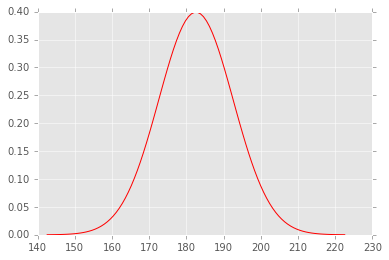

In [3]:
print 'fo_height = ',fo_height(80)
print 'so_height = ',so_height(80)
print 'prob_height = ',prob_height(80.)

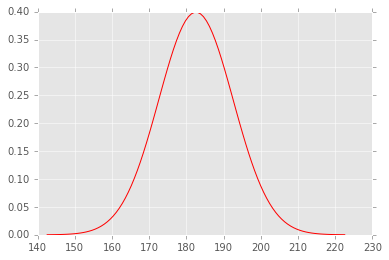

In [4]:
prob_height(80)

## Machine Learning

You can think of machine learning as a process of creating and using models that are *learned from data*. Typically our goal will be to use collected data to develop models that we can use to *predict* various outcomes for new data such as:
- Predicting whether an email is spam or not
- Predicting whether a credit card transaction is fradulent
- Predicting which advertisement a shopper is most likely to click on
- Predicting which football team is going to win the World cup

As the term goes on, we will look at how to use machine learning to train various models such as:
- supervised models -- data is labeled
- unsupervised models -- data is unlabeled
- semisupervised models -- partly labeled data
- online models -- models that adapt to new data that is streaming in

Typically, we will first choose a *parameterized* family of models then use data to learn the "best" parameters. More details in the future lectures.

## Overfitting and Underfitting

- Overfitting -- producing a model that performs well on the data we train it on but generalizes poorly to new data
- Underfitting -- producing a model that doesn't perform well even on the training data

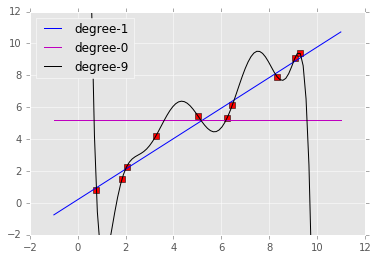

In [5]:
np.random.seed(101)
x = np.array([i + np.random.rand(1)*1.5 for i in range(10)]).reshape((10,))
y = np.array([i + np.random.rand(1)*1.5 for i in range(10)]).reshape((10,))
plt.plot(x,y,'sr')
p0 = np.poly1d(np.polyfit(x,y,0))
p1 = np.poly1d(np.polyfit(x,y,1))
p9 = np.poly1d(np.polyfit(x,y,9))
nx = np.linspace(-1,11,100)
plt.plot(nx,p1(nx),'-b',label="degree-1")
plt.plot(nx,p0(nx),'-m',label="degree-0")
plt.plot(nx,p9(nx),'-k',label="degree-9") #will predict through the red dot
plt.ylim([-2,12])
plt.legend(loc=2)
# ----------------------------------
# plt.figure()
# xx = np.array([i + np.random.rand(1)*1.5 for i in range(100)]).reshape((100,))
# yy = np.array([i + np.random.rand(1)*1.5 for i in range(100)]).reshape((100,))
# plt.plot(xx,yy,'ob')
# plt.xlim([0,12])
# plt.ylim([-2,12])

In [6]:

np.random.seed(112)
n1 = 6
n2 = 6
x1 = np.random.randn(n1)+2
x2 = np.random.randn(n2)

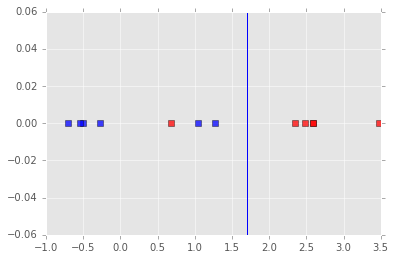

In [7]:
plt.plot(x1,np.zeros(n1),'sr',alpha=0.75)
plt.plot(x2,np.zeros(n2),'sb',alpha=0.75)
plt.axvline(x=1.7)

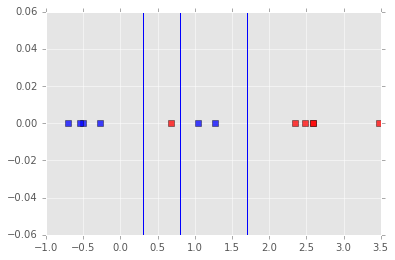

In [8]:
plt.plot(x1,np.zeros(n1),'sr',alpha=0.75)
plt.plot(x2,np.zeros(n2),'sb',alpha=0.75)
plt.axvline(x=1.7)
plt.axvline(x=0.8)
plt.axvline(x=0.3)

In [9]:
np.random.seed(112)
n1 = 20
n2 = 20
x1 = np.random.randn(n1)+2
x2 = np.random.randn(n2)

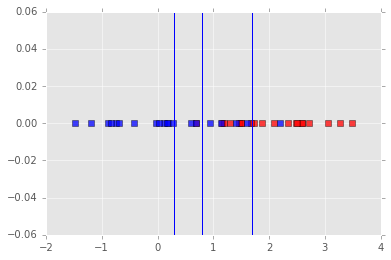

In [10]:
plt.plot(x1,np.zeros(n1),'sr',alpha=0.75)
plt.plot(x2,np.zeros(n2),'sb',alpha=0.75)
plt.axvline(x=1.7)
plt.axvline(x=0.8)
plt.axvline(x=0.3)

## How to deal with Overfitting

How do we know if our model is overfitting? A fundamental way to check is to use different set of data for training the model and for testing the model.

It is common to split our data set into train and test set. For example, we use about 75% for training the model and 25% for testing. If the model was overfit to the training data, then it will perform poorly on the test data. On the other hand, if the model performs well on the test data, then we gain some confident that our model generalizes quite well.

Sometimes, you might want to train multiple models and then choose the "best" performing one. The common practice is to have another set of data called *validation set* for this purpose. To summarize:
 - training set -- for training models
 - validation set -- for choosing model and/or tuning params
 - test set -- for evaluating the final model

## Correctness of Models

How do we know if a preditive model is performing well or not? For each prediction, there are total of 4 outcomes:
 - True positive
 - False positive (Type 1 Error)
 - False negative (Type 2 Error)
 - True negative
 
For example, consider a not-so-smart predictive model that predicts the person has cancer if his name is Tommy.

<table>
<tr>
<td></td><td>cancer</td><td>no cancer</td>
</tr>
<tr>
<td>Tommy</td><td>50(True Positive)</td><td>5000(False Negative)</td>
</tr>
<tr>
<td>not Tommy</td><td>15000(False Positive)</td><td>950000(True Negative)</td>
</tr>
</table>

Now let's compute: accuracy, precision, recall, and f1_score


### Accuracy

\# of correct predictions/ total \# of prediction

example = (50 + 950000)/970050
=0.979

### Precision

\# of True Positive/ total \# of Positive

example = 50/15050 = 0.003


### Recall

\# of True Positive/  \# of True Positive + \# of False Negative

example = 50/5050 = 0.01

### F1 Score

the hamonic mean of precision and recall = (2*p*r)/(p+r)






In [11]:
# Now let's compute: accuracy, precision, recall, and f1_score

true_pos, true_neg, false_pos, false_neg = 50., 950000., 15000., 5000.
all_prob = true_pos+true_neg+false_pos+false_neg
accuracy = (true_pos+true_neg)/all_prob
precision = true_pos/(true_pos+false_pos)
recall = true_pos/(true_pos+true_neg)
f1_score = (2* precision * recall)/(precision+recall)
print'accuracy = ', accuracy
print 'precision = ', precision
print 'recall = ', recall
print 'f1_score = ', f1_score

accuracy =  0.979382506056
precision =  0.00332225913621
recall =  5.26288090101e-05
f1_score =  0.000103616205575


## In-class exercise
Try to come up with a simple model for predicting class of leaves and report the accuracy, precision, recall, and f1_score of your model on the test set.

In [12]:
# focus on species-36 detector!!!


%matplotlib inline
from matplotlib import pyplot as plt
import math
import numpy as np
from glob import glob
import random

In [13]:
# This we try to read the data from leaf.csv
filename = 'leaf.csv'
data = np.genfromtxt(filename, delimiter=",")
print "len(data) =",len(data)

len(data) = 340


In [35]:
def find_test_train(data):
    length_test = int(len(data)*0.2)
#     print "length_test =",length_test
    random.seed(10)
    random_number = random.sample(range(len(data)),length_test)
    test = []
    train = []
    
#     print "random_number =",random_number

    for i in range(len(data)):
        if i in random_number:
            test.append(list(data[i]))

        else:
            train.append(list(data[i]))
    return np.array(test),np.array(train)
test_answer, train_answer = find_test_train(data)
print 'len(data) =', len(data)
print "20% test =",len(test_answer),", 80% train = ", len(train_answer)

len(data) = 340
20% test = 68 , 80% train =  272


In [36]:
# This function is that we are trying to seperate class between species_36 and others

def find_class(data):
    length_data = len(data)
    species_36 = []
    others = []
    for i in range(length_data):
#         print data[i][0]
        if data[i][0] == 36:
            species_36.append(list(data[i]))
        else:
            others.append(list(data[i]))
            
        
    return np.array(species_36), np.array(others)

species_36_train,others_train  = find_class(train_answer)
species_36_test,others_test  = find_class(test_answer)
print "len(species_36_train)",len(species_36_train) , "len(others_train) =", len(others_train)
print "len(species_36_test)",len(species_36_test) , "len(others_test) =", len(others_test)

len(species_36_train) 8 len(others_train) = 264
len(species_36_test) 2 len(others_test) = 66


In [16]:
# print species_36_train
print 

In [37]:
# Find Min Max of the attribute 5
def find_min_max(att, data):
    keep_data = []
    for i in data:
        keep_data.append(i[att])
    
    return keep_data
# keep_data = []
# for i in species_36_train:
# #     print i[4]
#     keep_data.append(i[4])
    
att_5_max = max(find_min_max(4,species_36_train))
att_5_min = min(find_min_max(4,species_36_train))

att_10_max = max(find_min_max(9,species_36_train))
att_10_min = min(find_min_max(9,species_36_train))
print att_5_min,att_5_max
print att_10_min,att_10_max
# 9

0.73351 0.85409
1.0289 3.184


In [38]:
keep_correct = 0.
true_neg = 0.
for i in train_answer:
    if i[4] > att_5_min and i[4] < att_5_max:
#         print i[0],i[4]
#         if i[9]> att_10_min and i[9] < att_10_max:
#         keep_correct+=1
        if i[0] == 36:
            keep_correct+=1
        
        
    else:
        true_neg +=1
        
#         
        
      
print (keep_correct +true_neg) / len(train_answer)
# all_of_the correct/ all data

0.970588235294


In [39]:
def find_true_pos(data):
    true_pos = 0.
    true_neg = 0.
    false_pos =0.
    false_neg=0.
    all_pos = 0.
    for i in data:
        if i[4] > att_5_min and i[4] < att_5_max:
#             print i[0]
            if i[0] == 36:
                true_pos+=1
            else:
                false_pos+=1


        else:
            if i[0] != 36:
                true_neg +=1
            else:
                false_neg +=1
    return true_pos,true_neg,false_pos,false_neg


In [40]:
# train data
true_pos,true_neg,false_pos,false_neg=find_true_pos(train_answer)

accuracy = (true_pos+true_neg) / len(train_answer)
percision = true_pos / (true_pos+false_pos)
recall = true_pos / (true_pos+false_neg)
print true_pos,true_neg,false_pos,false_neg
print  'accuracy of train data = ', accuracy
print 'percision of train data = ', percision
print 'recall of train data = ', recall
print 'F1 score of train data = ',  (2*percision*recall)/(percision+recall)






6.0 256.0 8.0 2.0
accuracy of train data =  0.963235294118
percision of train data =  0.428571428571
recall of train data =  0.75
F1 score of train data =  0.545454545455


In [42]:
# test data
true_pos,true_neg,false_pos,false_neg=find_true_pos(test_answer)

accuracy = (true_pos+true_neg) / len(test_answer)
percision = true_pos / (true_pos+false_pos)
recall = true_pos / (true_pos+false_neg)
print true_pos,true_neg,false_pos,false_neg
print  'accuracy of test data = ', accuracy
print 'percision of test data = ', percision
print 'recall of test data = ', recall
print 'F1 score of test data = ',  (2*percision*recall)/(percision+recall)

1.0 63.0 3.0 1.0
accuracy of test data =  0.941176470588
percision of test data =  0.25
recall of test data =  0.5
F1 score of test data =  0.333333333333
